In [42]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import seaborn as sns

# Bernoulli Distribution

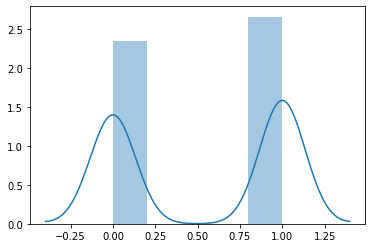

In [43]:
tfd = tfp.distributions

bernoulli_distribution = tfd.Bernoulli(probs=.5)
bernoulli_trials = bernoulli_distribution.sample(1000)


sns.distplot(bernoulli_trials)

In [44]:
# Properties of Bernoulli distribution
property_1 = bernoulli_distribution.prob(1)
print("P(x = 1) = {}".format(property_1))

property_2 = bernoulli_distribution.prob(0)
print("P(x = 0) = 1 - {} = {}".format(property_1, property_2))

print("Property three is a generalization of property 1 and 2")

print("For Bernoulli distribution The expected value of a Bernoulli random variable  X is p (E[X] = p)")

# Variance is calculated as Var = E[(X - E[X])**2]
property_5 = bernoulli_distribution.variance()
print("Var(x) = {0} (1 - {0})".format(property_5))


P(x = 1) = 0.5
P(x = 0) = 1 - 0.5 = 0.5
Property three is a generalization of property 1 and 2
For Bernoulli distribution The expected value of a Bernoulli random variable  X is p (E[X] = p)
Var(x) = 0.25 (1 - 0.25)


# Multinoulli Distribution

p :  [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
Dice throw values: [[ 9. 10. 10. 12.  9. 10.]]
In sixty trials, index 0 represents the times the dice landed on 1 (= 9.0 times) and
index 1 represents the times the dice landed on 2 (= 10.0 times)



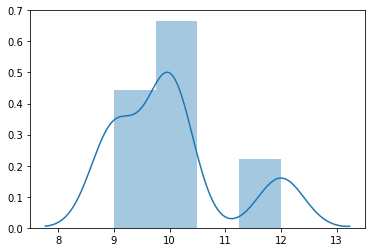

In [45]:
p = [1/6.]*6
print('p : ', p)

# Multinoulli distrubution with 60 trials and sampled once
mulitnoulli_distribution = tfd.Multinomial(total_count=60, probs=p)
multinoulli_pdf = mulitnoulli_distribution.sample(1)
print("""Dice throw values: {}
In sixty trials, index 0 represents the times the dice landed on 1 (= {} times) and
index 1 represents the times the dice landed on 2 (= {} times)\n""".format(multinoulli_pdf,
                                                                           multinoulli_pdf[0][0],
                                                                           multinoulli_pdf[0][1]))

g = sns.distplot(multinoulli_pdf)



# Gaussian Distribution

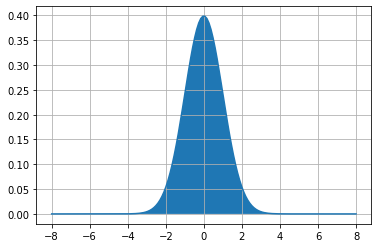

In [46]:
rand_x = tf.linspace(start=-8., stop=8., num=150)

sigma = float(1.)
mu = float(0.)
gaussian_pdf = tfd.Normal(loc=mu, scale=sigma).prob(rand_x)

[rand_x_, gaussian_pdf_] = ([rand_x.numpy(), gaussian_pdf.numpy()])


plt.plot(rand_x_, gaussian_pdf_)
plt.fill_between(rand_x_, gaussian_pdf_)
plt.grid()

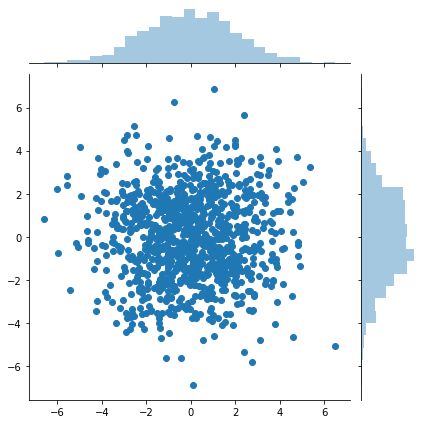

In [47]:
# multivariate normal distribution
mvn = tfd.MultivariateNormalDiag(loc=[0., 0.], scale_diag=[2., 2.])

samples = mvn.sample(1000)

g = sns.jointplot(samples[:, 0], samples[:, 1], kind='scatter')
plt.show()

# Exponential (Laplace) Distribution

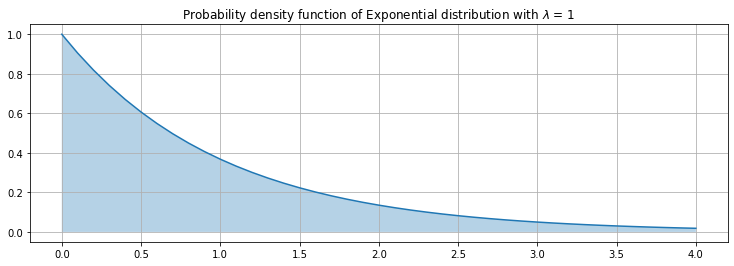

In [48]:
a = tf.linspace(start=0., stop=4., num=41)

a = a[..., tf.newaxis]
lambdas = tf.constant([1.])

expo_pdf = tfd.Exponential(rate=1.).prob(a)

[a_, expo_pdf_] = [a.numpy(), expo_pdf.numpy()]

plt.figure(figsize=(12.5, 4))
plt.plot(a_.T[0], expo_pdf_.T[[0]][0])
plt.fill_between(a_.T[0], expo_pdf_.T[[0]][0], alpha=.33)
plt.title(r"Probability density function of Exponential distribution with $\lambda$ = 1")
plt.grid()

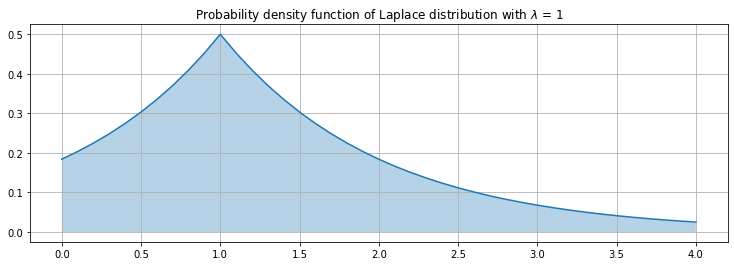

In [49]:
laplace_pdf = tfd.Laplace(loc=1, scale=1).prob(a)

[a_, laplace_pdf_] = [a.numpy(), laplace_pdf.numpy()]

plt.figure(figsize=(12.5, 4))
plt.plot(a_.T[0], laplace_pdf_.T[[0]][0])
plt.fill_between(a_.T[0], laplace_pdf_.T[[0]][0], alpha=.33)
plt.title(r"Probability density function of Laplace distribution with $\lambda$ = 1")
plt.grid()

In [55]:
def aleatoric_model():
    '''
    Linear regression (Heteroskedastic)
    '''
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(2),
    tfp.layers.DistributionLambda(lambda t:
                                 tfd.Normal(loc=t[...,0],
                                           scale=tf.math.softplus(t[...,1])))
    ])
    return model

In [56]:
def epistemic_model():
    '''
    Bayesiansian weights + Linear Regression
    (placing prior over weight to reduce epistemic uncertainty)
    '''
    model = tf.keras.Sequential([
        tfp.layers.DenseVariational(20, activation='relu'),
        tfp.layers.DenseVariational(1),
        tfp.layers.DistributionLambda(lambda t:
                                     tfp.Normal(loc=t[...,0],
                                               scale=1))
        
    ])
    return model

In [57]:
def epistemic_w_softplus_model():
    '''
    Bayesian weights + Linear Regression (Heteroskedastic)
    '''
    model = tf.keras.Sequential([
        tfp.layers.DenseVariational(20, activation='relu'),
        tfp.layers.DenseVariational(1),
        tfp.layers.DistributionLambda(lambda t:
                                     tfp.Normal(loc=t[...,0],
                                               scale=tf.softplus(t[...,1])))
    ])
    return model

In [58]:
## Incomplete model
def gaussian_process_model():
    num_inducing_points = 3
#     kernel_provider = ?
    
    '''
    Use Gaussian process are prior over functions ( not variables )
    '''
    model = tf.Sequential([
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(1),
        tfp.layers.VariationalGaussianProcess(
            num_inducing_points, kernel_provider
        )
    ])

In [59]:
model = epistemic_w_softplus_model()

negloglik = lambda y, p_y: -p_y.log_prob(y)

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
             loss=negloglik)
model.fit(samples[:,0], samples[:, 1], epochs=40)

TypeError: __init__() missing 2 required positional arguments: 'make_posterior_fn' and 'make_prior_fn'

In [21]:
pred = model.predict(samples[:, 0])
# pred = pred.reshape(-1)

TensorShape([1000, 2])

Text(0.5, 0.98, 'Ground truth distribution')

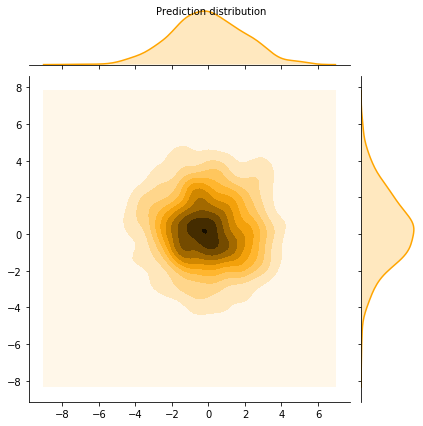

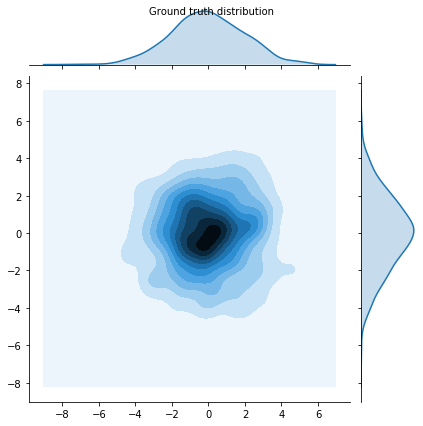

In [40]:
g = sns.jointplot(samples[:, 0], pred, kind='kde', color='orange')
g.fig.suptitle('Prediction distribution', fontsize=10)
b = sns.jointplot(samples[:, 0], samples[:, 1], kind='kde')
b.fig.suptitle('Ground truth distribution', fontsize=10)


In [64]:
samples[:,0].shape

TensorShape([1000])